# Scatter Plot (Bivariate Analysis)
* $X-axis$: shows the value of one variable
* $Y-axis$: shows the value of another variable
* $Dot$: shows the relationship between the two variables


In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

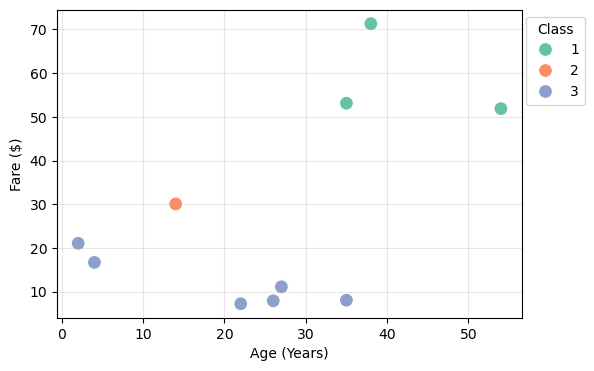

,Age,Fare,Pclass,Survived
0,22,7.25,3,0
1,38,71.28,1,1
2,26,7.92,3,1
3,35,53.10,1,1
4,35,8.05,3,0
5,54,51.86,1,0
6,2,21.07,3,0
7,27,11.13,3,1
8,14,30.07,2,1
9,4,16.70,3,1


In [2]:
# Dataset
data = {
    "Age": [22, 38, 26, 35, 35, 54, 2, 27, 14, 4],
    "Fare": [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.07, 11.13, 30.07, 16.70],
    "Pclass": [3, 1, 3, 1, 3, 1, 3, 3, 2, 3],
    "Survived": [0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
}
df = pd.DataFrame(data)


# Scatter plot
plt.figure(figsize = (6, 4))

sns.scatterplot(data = df, x = 'Age', y = 'Fare', s = 100, hue = 'Pclass', palette = 'Set2') # s = size of the dot 
plt.xlabel('Age (Years)')
plt.ylabel('Fare ($)')
plt.legend(title = 'Class',bbox_to_anchor = (1.15, 1))
plt.grid(True, alpha = 0.3)

plt.show()

print("="*60)
df


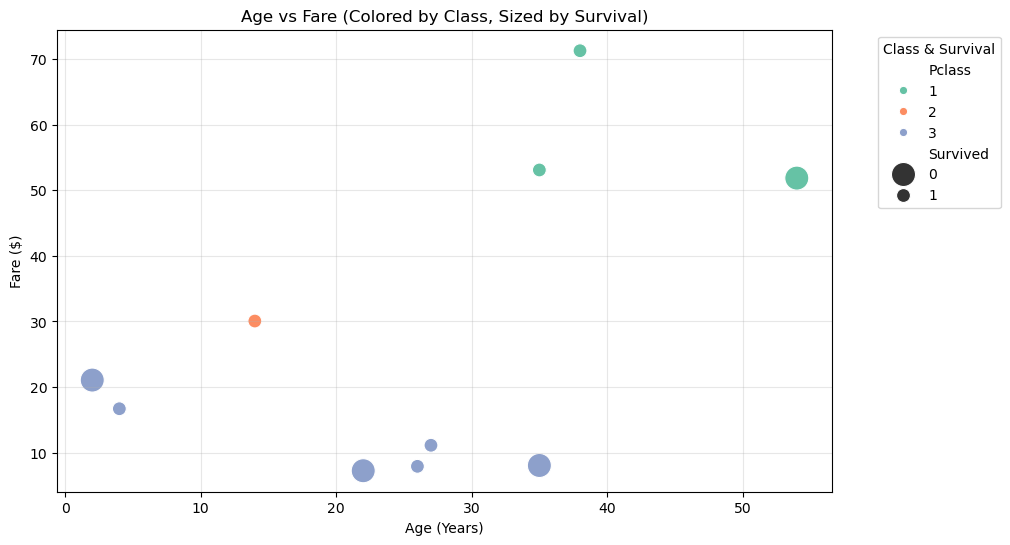

In [3]:
# Color by Class, then SIZE by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Fare", hue="Pclass", 
                size="Survived", sizes=(100, 300), palette="Set2")

plt.title("Age vs Fare (Colored by Class, Sized by Survival)")
plt.xlabel("Age (Years)")
plt.ylabel("Fare ($)")
plt.legend(title="Class & Survival", bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.show()


# Box Plot
* to compare **distribution across groups**
* show **median**, **quartiles**, **outliers** at a glance
* shows **how data is distributed** within each group using 5 key statistics:
    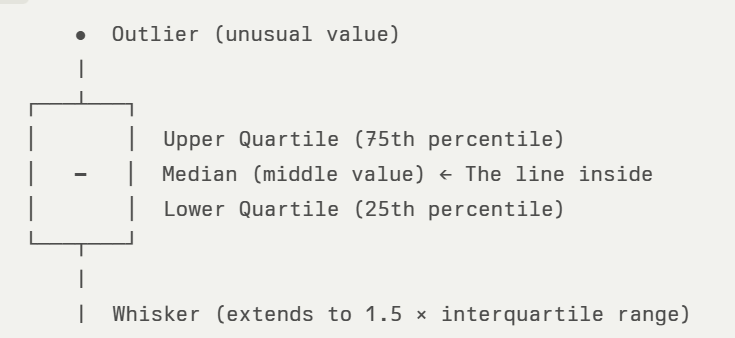

C:\Users\HP\AppData\Local\Temp\ipykernel_10488\2486806036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Pclass', y = 'Fare', palette = 'Set2')


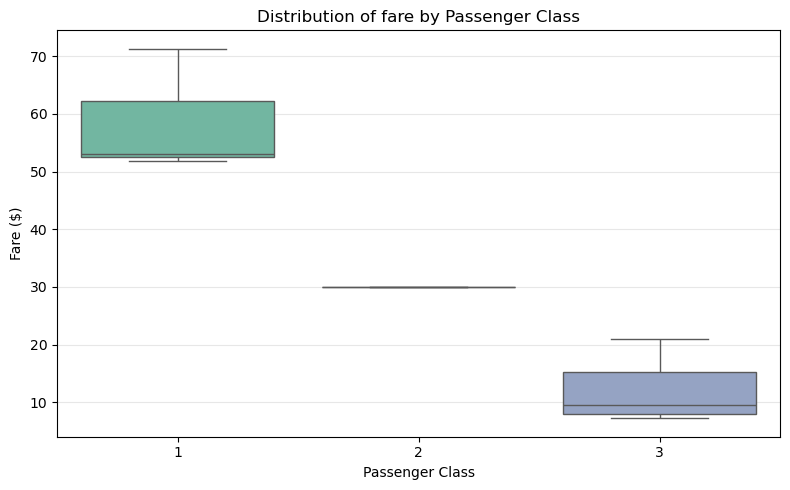

        count       mean        std    min      25%    50%      75%    max
Pclass                                                                    
1         3.0  58.746667  10.871878  51.86  52.4800  53.10  62.1900  71.28
2         1.0  30.070000        NaN  30.07  30.0700  30.07  30.0700  30.07
3         6.0  12.020000   5.655454   7.25   7.9525   9.59  15.3075  21.07


In [18]:
# Create Box plot
plt.figure(figsize = (8, 5))
sns.boxplot(data = df, x = 'Pclass', y = 'Fare', palette = 'Set2')

plt.title("Distribution of fare by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare ($)")
plt.grid(True, alpha = 0.3, axis = 'y') # axis = 'y' to only show horizontal grid lines
plt.tight_layout()

plt.show()
print("="*60)
print(df.groupby('Pclass')['Fare'].describe())

C:\Users\HP\AppData\Local\Temp\ipykernel_10488\2177505525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Pclass", y="Age", palette="Set2")


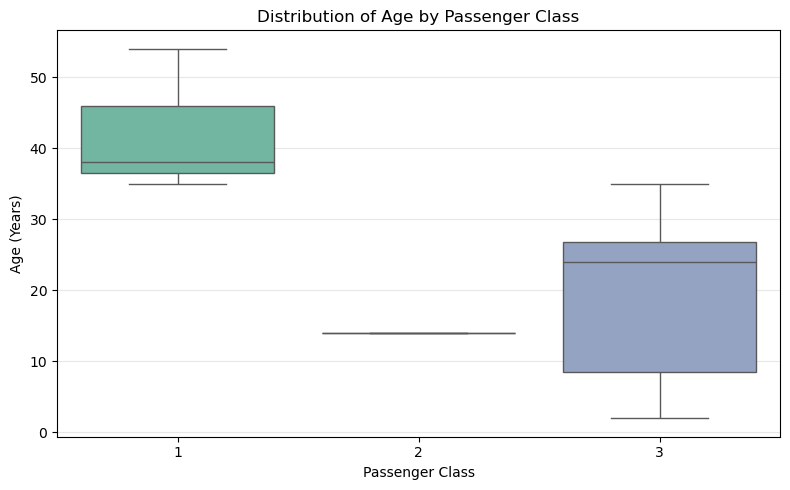

        count       mean        std   min   25%   50%    75%   max
Pclass                                                            
1         3.0  42.333333  10.214369  35.0  36.5  38.0  46.00  54.0
2         1.0  14.000000        NaN  14.0  14.0  14.0  14.00  14.0
3         6.0  19.333333  13.351654   2.0   8.5  24.0  26.75  35.0


In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Pclass", y="Age", palette="Set2")

plt.title("Distribution of Age by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age (Years)")
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

print("="*60)
print(df.groupby('Pclass')['Age'].describe())


## Crosstabs (Contigency Table)
* shows the relationship between two categorical varibales
* like a frequency table

In [26]:
# Crosstab: Class vs Survival (COUNTS)
print("\nCrosstab: Class vs Survival (Counts)")
crosstab = pd.crosstab(df['Pclass'], df['Survived'], margins = True, margins_name = 'Total')
print(crosstab)
print("="*60)

# Crosstab: Class vs Survival (PERCENTAGES)
print("\nCrosstab: Class vs Survival (Percentages)")
survival_rate = (pd.crosstab(df['Pclass'], df['Survived'], margins = True, margins_name = 'Total', normalize = 'index') * 100 ).round(2)
print(survival_rate)
print("="*60)


Crosstab: Class vs Survival (Counts)
Survived  0  1  Total
Pclass               
1         1  2      3
2         0  1      1
3         3  3      6
Total     4  6     10

Crosstab: Class vs Survival (Percentages)
Survived      0       1
Pclass                 
1         33.33   66.67
2          0.00  100.00
3         50.00   50.00
Total     40.00   60.00


In [30]:
df['Age_Group'] = pd.cut(df['Age'], bins = [0, 12, 18, 35, 60], labels = ['Child (0-12)', 'Teen (13-18)', 'Adult (19-35)', 'Senior (36+)'])

print("\nAGE GROUPS:")
print(df[['Age', 'Age_Group', 'Survived']].sort_values(by = 'Age'))
print("="*60)
print("\nSURVIVAL BY AGE GROUP (%):")
age_survival = (pd.crosstab(df['Age_Group'], df['Survived'], margins = True, margins_name = 'Total', normalize = 'index') * 100).round(2)
print(age_survival)
print("="*60)


AGE GROUPS:
   Age      Age_Group  Survived
6    2   Child (0-12)         0
9    4   Child (0-12)         1
8   14   Teen (13-18)         1
0   22  Adult (19-35)         0
2   26  Adult (19-35)         1
7   27  Adult (19-35)         1
4   35  Adult (19-35)         0
3   35  Adult (19-35)         1
1   38   Senior (36+)         1
5   54   Senior (36+)         0

SURVIVAL BY AGE GROUP (%):
Survived          0      1
Age_Group                 
Child (0-12)   50.0   50.0
Teen (13-18)    0.0  100.0
Adult (19-35)  40.0   60.0
Senior (36+)   50.0   50.0
Total          40.0   60.0


In [32]:
combned_analysis = pd.crosstab([df['Pclass'], df['Age_Group']], df['Survived'], margins = True, margins_name = 'Total')
print("\nCOMBINED ANALYSIS: CLASS & AGE GROUP vs SURVIVAL (COUNTS)")
print(combned_analysis)

# Crosstab: Combined Class & Age Group vs Survival (PERCENTAGES)
combined_survival = (pd.crosstab([df['Pclass'], df['Age_Group']], df['Survived'], margins = True, margins_name = 'Total', normalize = 'index') * 100).round(2)
print("\nCOMBINED ANALYSIS: CLASS & AGE GROUP vs SURVIVAL (PERCENTAGES)")
print(combined_survival)


COMBINED ANALYSIS: CLASS & AGE GROUP vs SURVIVAL (COUNTS)
Survived              0  1  Total
Pclass Age_Group                 
1      Adult (19-35)  0  1      1
       Senior (36+)   1  1      2
2      Teen (13-18)   0  1      1
3      Child (0-12)   1  1      2
       Adult (19-35)  2  2      4
Total                 4  6     10

COMBINED ANALYSIS: CLASS & AGE GROUP vs SURVIVAL (PERCENTAGES)
Survived                 0      1
Pclass Age_Group                 
1      Adult (19-35)   0.0  100.0
       Senior (36+)   50.0   50.0
2      Teen (13-18)    0.0  100.0
3      Child (0-12)   50.0   50.0
       Adult (19-35)  50.0   50.0
Total                 40.0   60.0


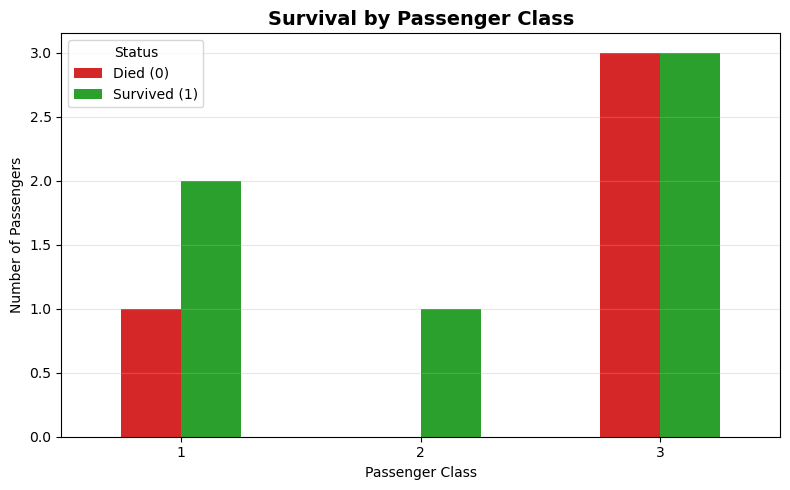

In [36]:
# Stacked bar chart
fig, ax = plt.subplots(figsize = (8,5))
pd.crosstab(df['Pclass'], df['Survived']).plot(kind = 'bar', stacked = False, ax = ax, color = ["#d62728", "#2ca02c"])


plt.title("Survival by Passenger Class", fontsize=14, fontweight="bold")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(["Died (0)", "Survived (1)"], title="Status")
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

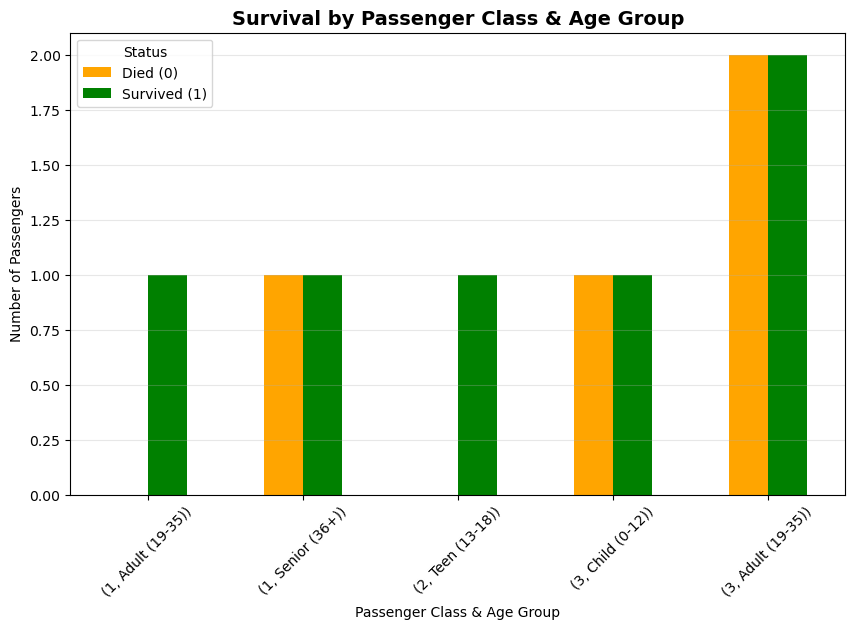

In [37]:
# Combine analysis visualization
fig, ax = plt.subplots(figsize = (10, 6))

pd.crosstab([df['Pclass'], df['Age_Group']], df['Survived']).plot(kind = 'bar', stacked = False, ax = ax, color = ['orange', 'green'])

plt.title("Survival by Passenger Class & Age Group", fontsize=14, fontweight="bold")
plt.xlabel("Passenger Class & Age Group")
plt.ylabel("Number of Passengers")
plt.legend(["Died (0)", "Survived (1)"], title="Status")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")

plt.show()

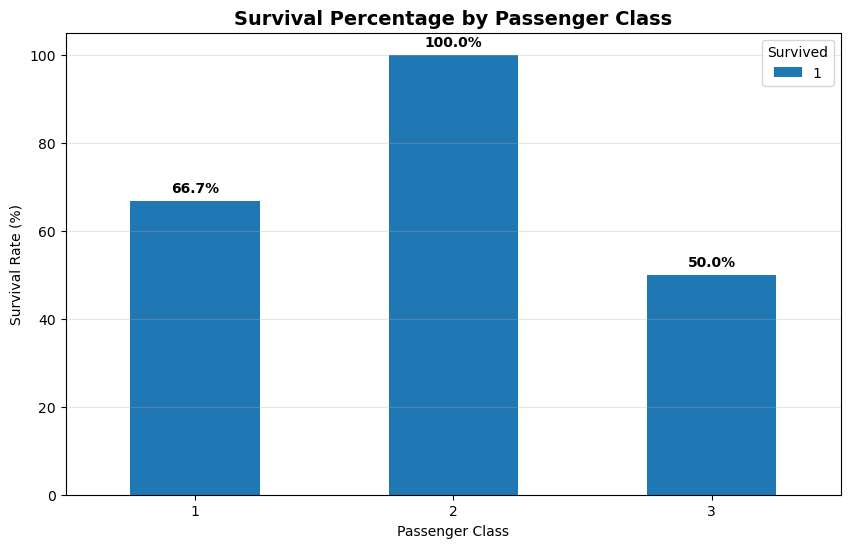

SURVIVAL PERCENTAGE BY PASSENGER CLASS: Died (0) vs Survived (1)
Survived      0       1
Pclass                 
1         33.33   66.67
2          0.00  100.00
3         50.00   50.00


In [60]:
fig, ax = plt.subplots(figsize = (10, 6))

(pd.crosstab(df['Pclass'], df['Survived'],  normalize = 'index') * 100).round(2).iloc[:, 1:].plot(kind = 'bar', stacked = True, ax = ax, color =  '#1f77b4')
plt.title("Survival Percentage by Passenger Class", fontsize=14, fontweight="bold")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis="y")

# Add percentage labels on bars
for i, v in enumerate( (pd.crosstab(df['Pclass'], df['Survived'],  normalize = 'index') * 100).round(2).iloc[:, 1]):
    ax.text(i, v + 2 , f"{v:.1f}%", ha="center", fontweight="bold")
    
plt.show()

print("="*60)
print("SURVIVAL PERCENTAGE BY PASSENGER CLASS: Died (0) vs Survived (1)")
print((pd.crosstab(df['Pclass'], df['Survived'],  normalize = 'index') * 100).round(2))

In [62]:
import seaborn as sns 
from scipy.stats import chi2_contingency

In [63]:
# We will create 200 rows of random data
np.random.seed(42) # This ensures we get the same random numbers every time

# Create a DataFrame with 200 rows
df = pd.DataFrame({
    'Customer_ID': range(1, 201),
    'Gender': np.random.choice(['Male', 'Female'], size=200),
    'Product': np.random.choice(['Smart Watch', 'Laptop', 'Headphones'], size=200)
})

df

,Customer_ID,Gender,Product
0,1,Male,Headphones
1,2,Female,Headphones
2,3,Male,Smart Watch
3,4,Male,Smart Watch
4,5,Male,Laptop
...,...,...,...
195,196,Female,Laptop
196,197,Female,Headphones
197,198,Female,Smart Watch
198,199,Male,Smart Watch



The Generated Crosstab
Product  Headphones  Laptop  Smart Watch  Total
Gender                                         
Female           31      37           32    100
Male             35      24           41    100
Total            66      61           73    200
------------------------------------------------------------
Chi-Square Statistic: 4.1225
P-Value: 0.1273
------------------------------------------------------------
Expected Frequencies:
[[33.  30.5 36.5]
 [33.  30.5 36.5]]
------------------------------------------------------------
Result: Independent (No significant relationship between Gender and Product)
Visualization:


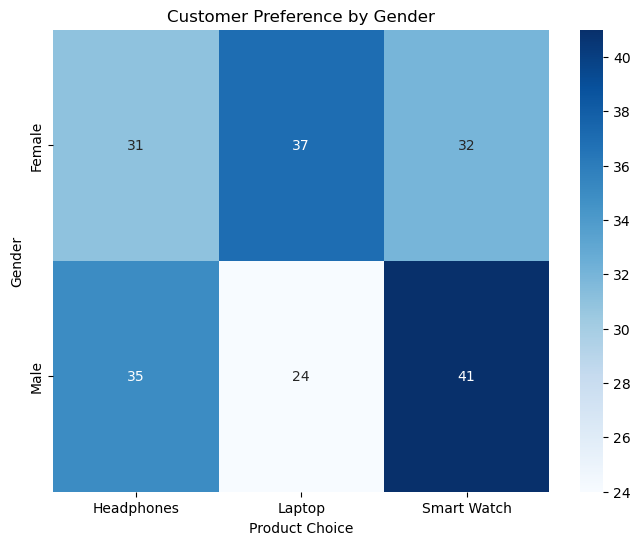

In [71]:
crosstab_result = pd.crosstab(df['Gender'], df['Product'], margins = True, margins_name = 'Total')
print("="*60)
print("\nThe Generated Crosstab")
print(crosstab_result)
print("-"*60)

# Calculate Chi-Square Test
chi2, p, dof, expected = chi2_contingency(crosstab_result.iloc[:-1, :-1])  # Exclude margins for the test
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print("-"*60)
print(f'Expected Frequencies:\n{expected}')
print("-"*60)

# Interpration
threshold = 0.05
if p < threshold:
    print("Result: Dependent (Significantly relationship between Gender and Product)")
else:
    print("Result: Independent (No significant relationship between Gender and Product)")


print("="*60)
print("Visualization:")

plt.figure(figsize = (8,6))

# We visualize the 'expected' vs 'observed' difference
# Or just the raw frequencies to see where the sales are
sns.heatmap(crosstab_result.iloc[:-1, :-1], annot = True, fmt = 'd', cmap = 'Blues')

plt.title('Customer Preference by Gender')
plt.ylabel('Gender')
plt.xlabel('Product Choice')
plt.show()